# 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

In [1]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.6.0'

레이어들을 import하는 방식 (1)
- 일일이 import 하지 않아도 됨

- 코드가 다소 길어질 수 있음

In [2]:
from tensorflow import keras

keras.__version__

'2.6.0'

In [3]:
keras.layers.Dense(10, activation = 'sigmoid')

In [4]:
keras.Model()

In [5]:
keras.models.Sequential()

레이어들을 import하는 방식 (2)
- 일일이 import 해야함
- 코드가 간결

In [6]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [7]:
Dense(units = 10, activation = 'relu')

In [8]:
Flatten(input_shape = [28, 28])

In [9]:
X_train = np.random.randn(5500, 2)

Input(shape = X_train.shape[1:])

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

## 주요 레이어

### Dense
- Fully-Connected Layer

- 노드수(유닛수), 활성화 함수 등을 지정

- name을 통한 레이어간 구분 가능

- 기본적으로  
  'Glorot_uniform'(Xavier 분포 초기화) 가중치, zeros bias로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [10]:
dense = Dense(units = 10, activation = 'relu', name = 'Dense Layer')

In [11]:
dense

In [12]:
dense2 = Dense(units = 15, activation = 'softmax')

In [13]:
dense2

### Activation
- Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 따로 레이어를 만들어줄 수 있음

In [14]:
dense = Dense(units = 10, kernel_initializer = 'he_normal', name = 'Dense Layer')
dense = Activation(dense)
dense

### Flatten
- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업

- 예시)
        (128, 3, 2, 2) ---> (128, 12)
      

In [15]:
Flatten(input_shape = (28, 28))

### Input 
- 모델의 입력을 정의

- shape, dtype을 포함

- 하나의 모델은 여러 개의 입력을 가질 수 있음

- `summary()` 메소드를 통해서는 보이지 않음

In [16]:
input_1 = Input(shape = (28, 28), dtype = tf.float32)
input_2 = Input(shape = (8, ), dtype = tf.int32)

In [17]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [18]:
input_2

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_3')>

## 모델 구성 방법
- Sequential()

- 서브클래싱(Subclassing)

- 함수형 API

### Sequential()

- 모델이 순차적으로 진행할 때 사용

- 간단한 방법
  - Sequential 객체 생성 후, **add**를 통한 방법
  
  - Sequential 인자에 한번에 추가

- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [19]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [20]:
model = Sequential()
model.add(Input(shape = (28, 28)))
model.add(Dense(units = 300, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
# 최종결과 확인, Mnist 결과라고 가정 // 다중분류문제할땐 주로 softmax 함수 사용
model.add(Dense(units = 10, activation = 'softmax'))

모델 구조 확인
- model 객체의 **summary()** 이용

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_4 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_5 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


In [24]:
#!pip install pydot

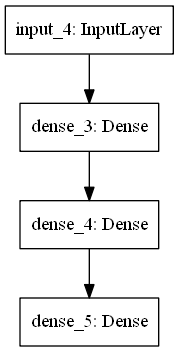

In [22]:
plot_model(model)

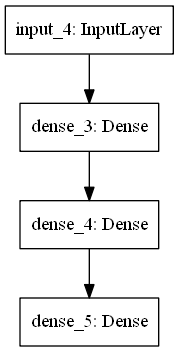

In [24]:
plot_model(model, to_file = 'model1.png')

In [25]:
model = Sequential([Input(shape = (28, 28), name = 'Input'),
                   Dense(300, activation = 'relu', name = 'Dense1'),
                   Dense(100, activation = 'relu', name = 'Dense2'),
                   Dense(10, activation = 'softmax', name = 'Output')])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


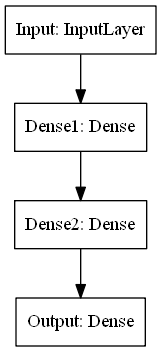

In [27]:
plot_model(model)

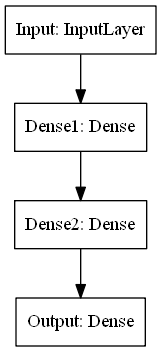

In [28]:
plot_model(model, to_file = 'model2.png')

### 함수형 API

- 가장 권장되는 방법

- 모델을 복잡하고, 유연하게 구성 가능

- 다중 입출력을 다룰 수 있음

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [31]:
inputs = Input(shape = (28, 28, 1))

x = Flatten(input_shape = (28, 28, 1))(inputs)
x = Dense(300, activation = 'relu')(x)
x = Dense(100, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)

In [32]:
model = Model(inputs = inputs, outputs = x)

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


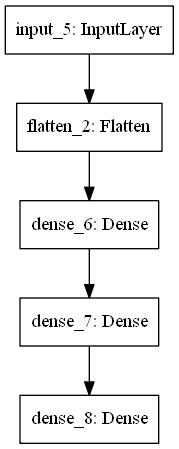

In [34]:
plot_model(model)

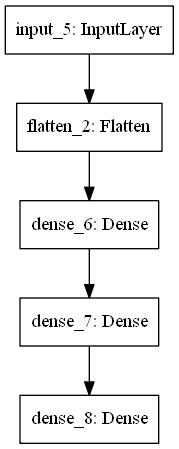

In [35]:
plot_model(model, to_file = 'model3.png')

In [37]:
from tensorflow.keras.layers import Concatenate

# widen deep
input_layer = Input(shape = (28, 28))
hidden1 = Dense(100, activation = 'relu')(input_layer)
hidden2 = Dense(30, activation = 'relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs = [input_layer], outputs = [output])

In [38]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 28, 100)      2900        input_7[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 28, 30)       3030        dense_12[0][0]                   
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 58)       0           input_7[0][0]                    
                                                                 dense_13[0][0]             

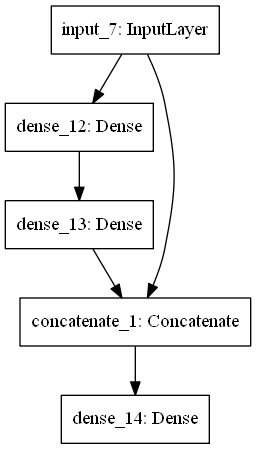

In [39]:
plot_model(model)

In [42]:
# 다중레이어 (여러개의 입력값) >> input_layer가 2개 이상
input_1 = Input(shape = (10, 10), name = 'input_1')
input_2 = Input(shape = (10, 28), name = 'input_2')

# wide layer, deep layer 구분 >> 다중레이어 생성
hidden1 = Dense(100, activation = 'relu')(input_2)
hidden2 = Dense(10, activation = 'relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation = 'sigmoid', name = 'output')(concat)

model = Model(inputs = [input_1, input_2], outputs = [output])

In [43]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 10, 10)       1010        dense_19[0][0]                   
____________________________________________________________________________________________

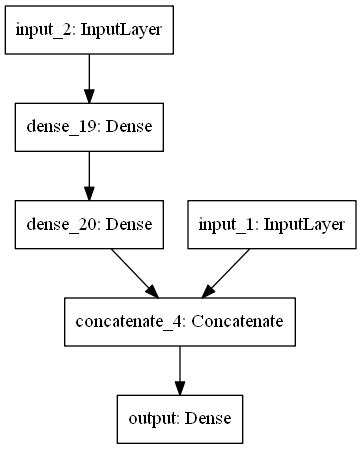

In [44]:
plot_model(model, to_file = 'model5.png')

In [46]:
# 다중출력
input_ = Input(shape = (10, 10), name = 'input_')

hidden1 = Dense(100, activation = 'relu')(input_)
hidden2 = Dense(10, activation = 'relu')(hidden1)

output = Dense(1, activation = 'sigmoid', name = 'main_output')(hidden2)
sub_out = Dense(1, name = 'sum_output')(hidden2)

model = Model(inputs = [input_], outputs = [output, sub_out])

In [47]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 10, 10)       1010        dense_23[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_24[0][0]                   
____________________________________________________________________________________________

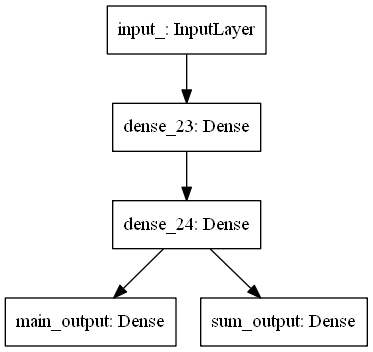

In [48]:
plot_model(model, to_file = 'model6.png')

### 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법

- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`

- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등

- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때  
  해석할 수 있어야함

## 모델 가중치 확인

모델의 레이어들이 리스트로 표현됨

위의 layer name 참고

## 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정


### 참고1

#### loss
- `keras.losses.sparse_categorical_crossentropy` 등과 같이 지정 가능
  - `sparse_categorical_crossentropy`  
    클래스가 배타적, 즉 MNIST 예제에서 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용

  - `categorical_cross_entropy`
    클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용

  - `binary_crossentropy`
  이진 분류를 수행할 때 사용


#### optimizer
- `keras.optimizer.SGD()` 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    
        optimizer = keras.optimizer.SGD(learning_rate=1e-5)  
        model.compile(...,
                      optimizer=optimzer,
                      ...)

- `keras.optimizer.Adam()` 도 많이 사용

#### metrics
- 모니터링할 지표

- 주로 'accuracy', 'acc'로도 가능


### 참고2 - 컴파일 설정 예시
- 평균 제곱 오차 회귀 문제  
      model.compile(loss = 'mse',  
                    optimizer = RMSprop(),  
                    metrics=['mae'])

- 이진 분류
      model.compile(loss = 'binary_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])



- 다항 분류
      model.compile(loss = 'categorical_crossentropy',  
                    optimizer = RMSprop(),  
                    metrics=['accuracy])
 


## 모델 훈련, 평가 및 예측
- `fit()` 함수

  - train_data(학습 데이터), train_label(데이터의 정답)
  
  - epochs
  
  - batch_size
  
  - validation_data

- `evaluate()` 함수
  - 테스트 데이터


- `predict()`
  임의의 데이터를 인자로 넣어 예측 가능

## MNIST 예제를 통해 모델 구성하기

- keras.datasets 에 포함되어 있는 데이터셋

  <img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width="400">

  <sub>출처: https://www.tensorflow.org/datasets/catalog/mnist</sub>

### modules import